<a href="https://colab.research.google.com/github/Komal2023/Signal_Strategy_for_Reliance/blob/main/Signal_Generator_for_Relian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install alpha_vantage
from alpha_vantage.timeseries import TimeSeries

ts = TimeSeries(key='98OKO4MV5K351LP2', output_format='pandas')
data, meta_data = ts.get_daily(symbol='RELIANCE.BSE', outputsize='compact')
print(data.head())


            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-02  1408.40  1426.00  1408.40   1421.95  3746656.0
2025-04-30  1404.90  1411.85  1373.50   1408.35  3375628.0
2025-04-29  1370.35  1410.90  1370.20   1400.30  6415191.0
2025-04-28  1332.35  1374.90  1320.15   1368.50  1269304.0
2025-04-25  1301.00  1325.25  1288.00   1300.05  1543897.0


In [ ]:
print(data.head())

               1. open     2. high      3. low    4. close  5. volume
date                                                                 
2025-05-02  29845.5508  30860.0000  29778.8496  30752.6992      213.0
2025-04-30  29700.0508  30094.1504  29700.0508  29876.9492       75.0
2025-04-29  29806.0000  30110.0000  29562.5508  30094.3496       87.0
2025-04-28  29323.4492  29866.0000  29323.4492  29748.9492      206.0
2025-04-25  30186.0000  30186.0000  29404.3496  29747.9004      177.0


In [ ]:
data.to_csv('RELIANCE.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<Axes: xlabel='date'>

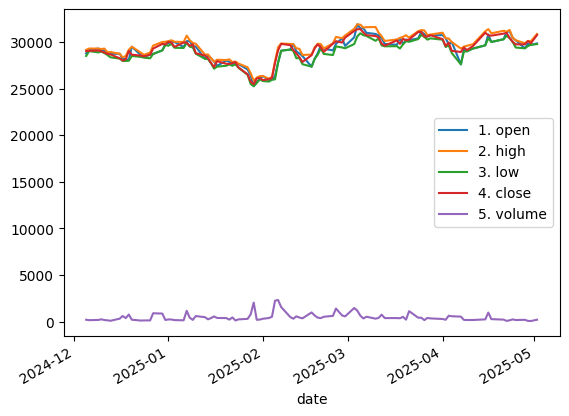

In [ ]:
data.plot()

<Axes: xlabel='date'>

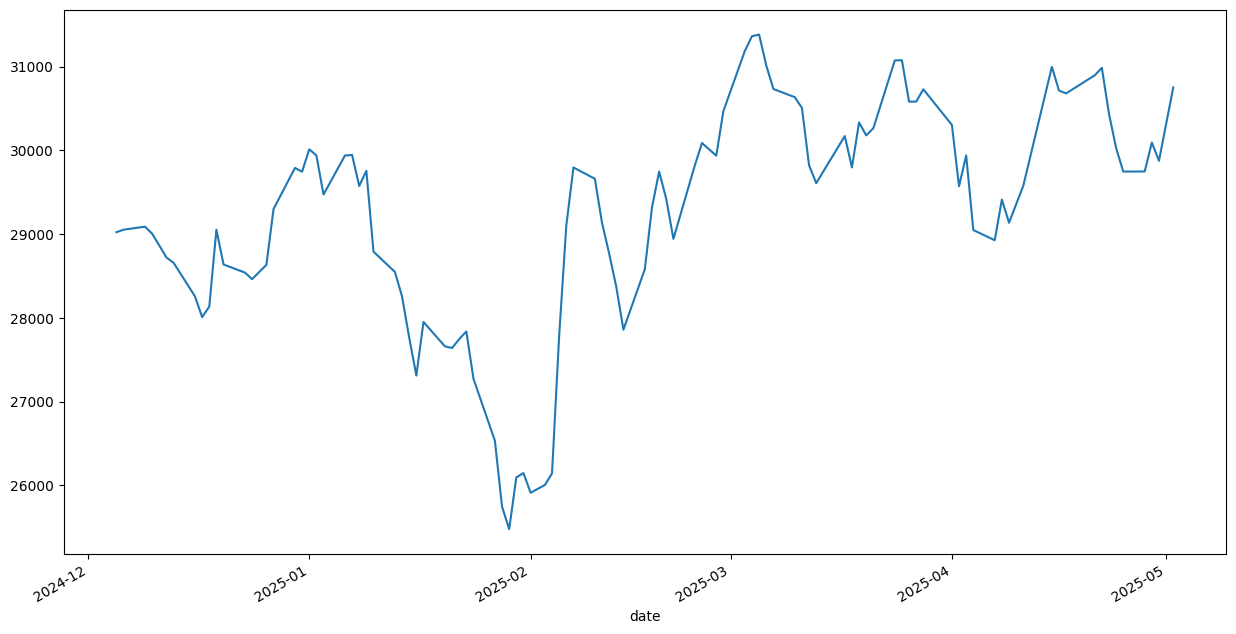

In [ ]:
data.close.plot(figsize = (15,8))

In [ ]:
print(data.columns)

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')


In [ ]:
data.rename(columns={'1. open' : "open",
                     '2. high' : "high",
                     '3. low'  : "low",
                     '4. close': "close",
                     '5. volume': "volume"}, inplace=True)


In [ ]:
data['20_SMA'] = data.close.rolling(window=20,min_periods=1).mean()
data['50_SMA'] = data.close.rolling(window=50,min_periods=1).mean()

In [ ]:
data['20_SMA']

,20_SMA
date,
2025-05-02,30752.699200
2025-04-30,30314.824200
2025-04-29,30241.332667
2025-04-28,30118.236800
2025-04-25,30044.169520
...,...
2024-12-11,29085.087500
2024-12-10,29056.592580
2024-12-09,29013.775100


In [ ]:
data['signal'] = 0
data['signal'] = np.where(data['20_SMA'] > data['50_SMA'],1,0)

In [ ]:
data['signal']

,signal
date,
2025-05-02,0
2025-04-30,0
2025-04-29,0
2025-04-28,0
2025-04-25,0
...,...
2024-12-11,1
2024-12-10,1
2024-12-09,1


In [ ]:
data['position'] = data.signal.diff()

In [ ]:
data['position']


,position
date,
2025-05-02,NaN
2025-04-30,0.0
2025-04-29,0.0
2025-04-28,0.0
2025-04-25,0.0
...,...
2024-12-11,0.0
2024-12-10,0.0
2024-12-09,0.0


<ipython-input-44-de55b2651637>:7: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(data.iloc[-300:][data.iloc[-300:]['position'] == 1].index,


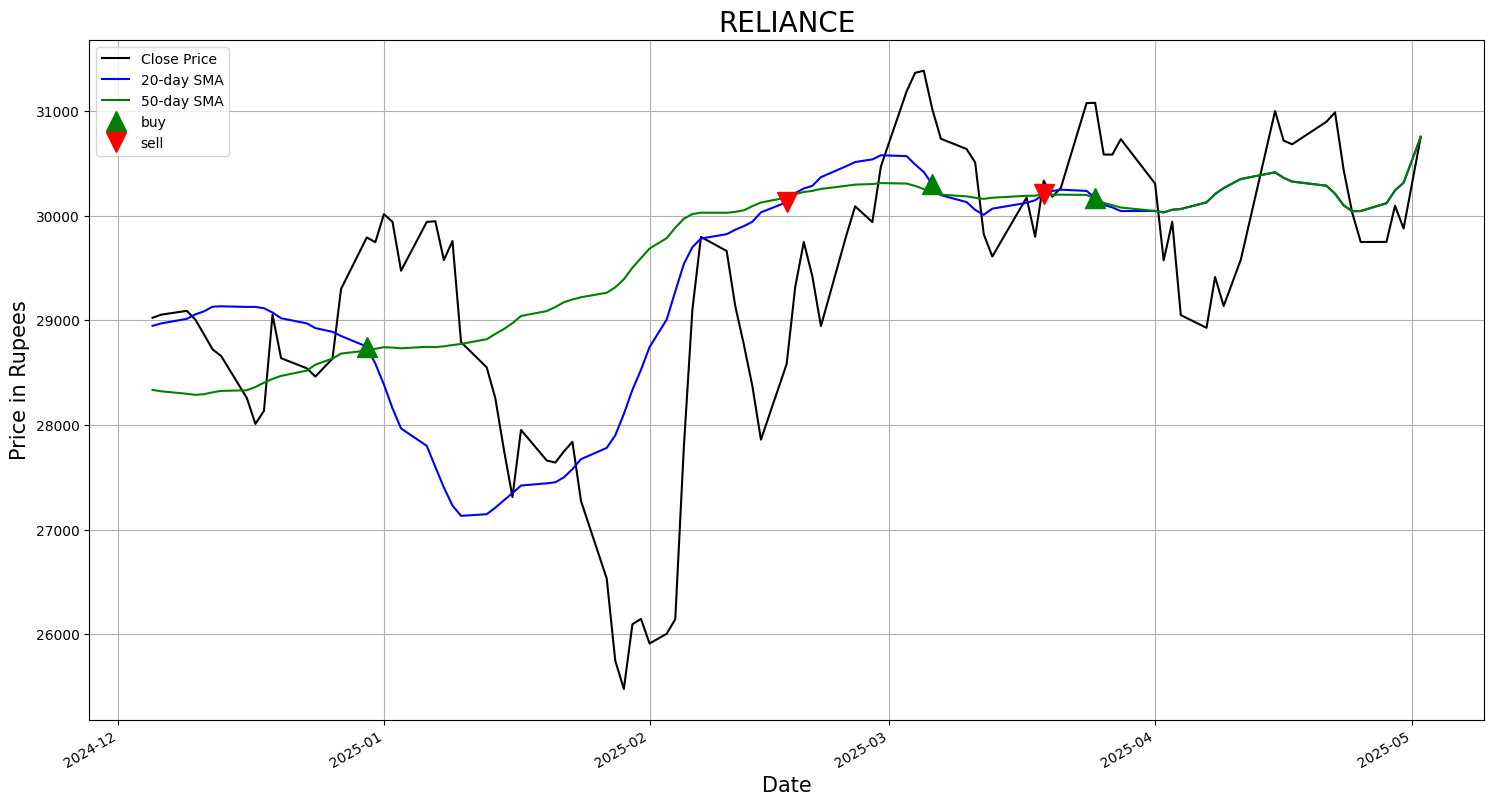

In [ ]:
plt.figure(figsize = (18,10))
# plot close price, short-term and long-term moving averages
data.iloc[-300:]['close'].plot(color = 'k', label= 'Close Price')
data.iloc[-300:]['20_SMA'].plot(color = 'b',label = '20-day SMA')
data.iloc[-300:]['50_SMA'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(data.iloc[-300:][data.iloc[-300:]['position'] == 1].index,
         data.iloc[-300:]['20_SMA'][data.iloc[-300:]['position'] == 1],
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(data.iloc[-300:][data.iloc[-300:]['position'] == -1].index,
         data.iloc[-300:]['20_SMA'][data.iloc[-300:]['position'] == -1],
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('RELIANCE', fontsize = 20)
plt.legend()
plt.grid()
plt.show()


In [ ]:
def GoldenCrossverSignal(name, data_point):
    path = f'{name}.csv'
    data = pd.read_csv(path, parse_dates=['date'], index_col='date')

    # Check if the 'close' column exists, if not, rename the column
    if 'close' not in data.columns:
        # Assuming the column name is '4. close'
        # If the column name is different, replace '4. close' with the actual name
        data.rename(columns={'4. close': 'close'}, inplace=True)

    data['20_SMA'] = data.close.rolling(window=20, min_periods=1).mean()
    data['50_SMA'] = data.close.rolling(window=50, min_periods=1).mean()
    data['Signal'] = 0
    data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1, 0)
    data['position'] = data.Signal.diff()
    plt.figure(figsize = (20,10))
    # plot close price, short-term and long-term moving averages
    data.iloc[-data_point:]['close'].plot(color = 'k', label= 'Close Price')
    data.iloc[-data_point:]['20_SMA'].plot(color = 'b',label = '20-day SMA')
    data.iloc[-data_point:]['50_SMA'].plot(color = 'g', label = '50-day SMA')
    # plot ‘buy’ signals
    plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]['position'] == 1].index,
             data.iloc[-data_point:]['20_SMA'][data.iloc[-data_point:]['position'] == 1],
             '^', markersize = 15, color = 'g', label = 'buy')
    # plot ‘sell’ signals
    plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]['position'] == -1].index,
             data.iloc[-data_point:]['20_SMA'][data.iloc[-data_point:]['position'] == -1],
             'v', markersize = 15, color = 'r', label = 'sell')
    plt.ylabel('Price in Rupees', fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    plt.title(name, fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()
    df_pos = data.iloc[-data_point:][(data.iloc[-data_point:]['position'] == 1) | (data['position'] == -1)].copy()
    df_pos['position'] = df_pos['position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
    print(tabulate(df_pos[['close', 'position']], headers = 'keys', tablefmt = 'psql'))

<ipython-input-75-9c17e56f3c31>:22: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]['position'] == 1].index,


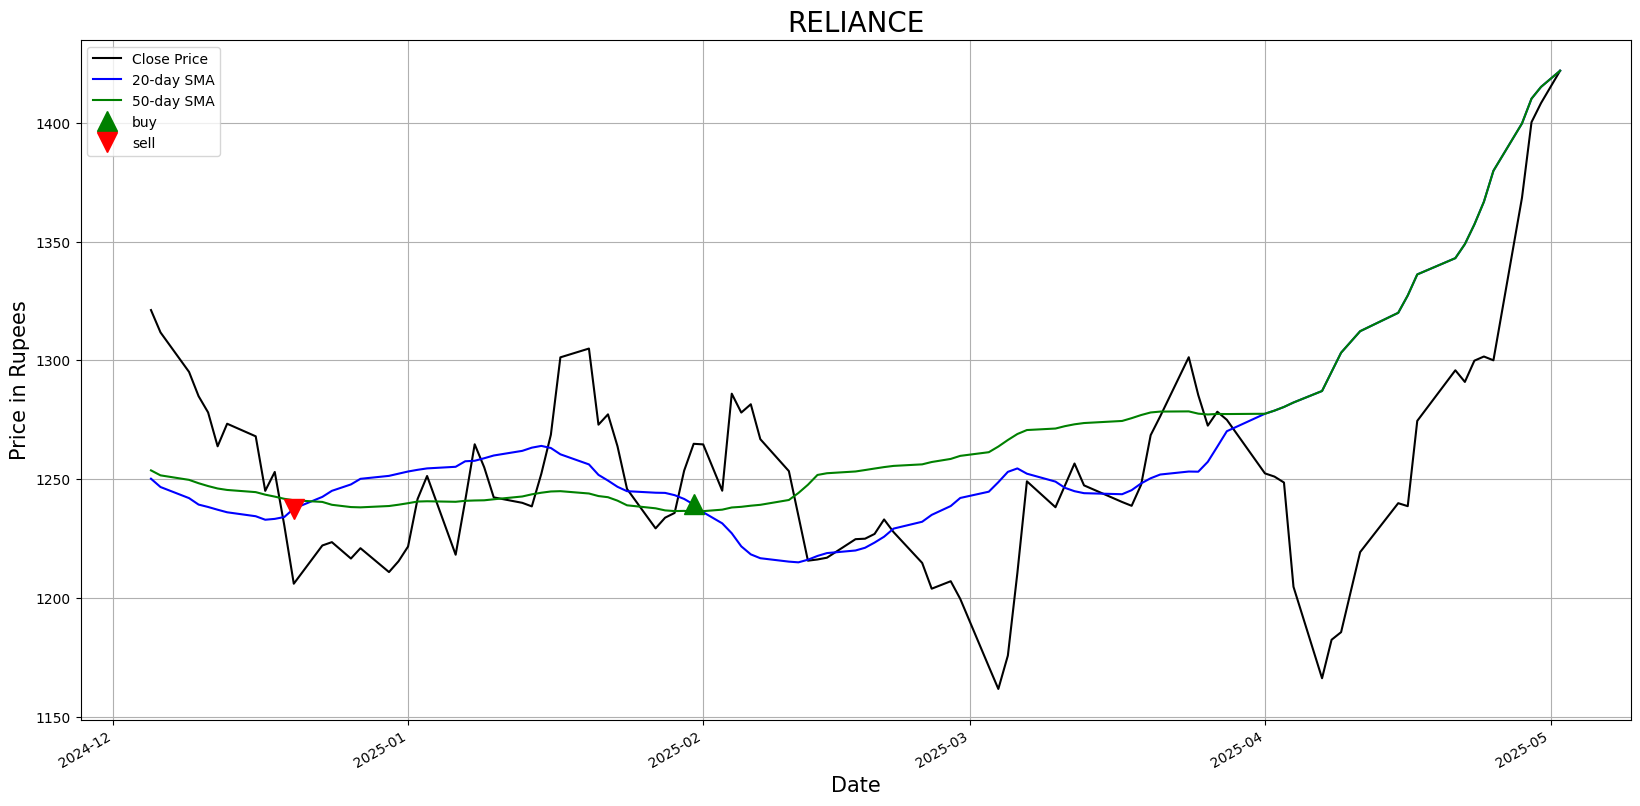

+---------------------+---------+------------+
| date                |   close | position   |
|---------------------+---------+------------|
| 2025-01-31 00:00:00 |  1264.9 | Buy        |
| 2024-12-20 00:00:00 |  1206   | Sell       |
+---------------------+---------+------------+


In [ ]:
GoldenCrossverSignal('RELIANCE',300)

In [ ]:
from tabulate import tabulate

df_pos = data.iloc[-200:][(data.iloc[-200:]['position'] == 1) | (data['position'] == -1)].copy()
df_pos['position'] = df_pos['position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_pos[['close', 'position']], headers = 'keys', tablefmt = 'psql'))



+---------------------+---------+------------+
| date                |   close | position   |
|---------------------+---------+------------|
| 2025-03-25 00:00:00 | 31077.8 | Buy        |
| 2025-03-19 00:00:00 | 30334.8 | Sell       |
| 2025-03-06 00:00:00 | 31016.8 | Buy        |
| 2025-02-17 00:00:00 | 28582.7 | Sell       |
| 2024-12-30 00:00:00 | 29791.2 | Buy        |
+---------------------+---------+------------+
